# Data Mining - Naive Bayes 🎲

**Authors:** [Melissa Perez](https://github.com/MelissaPerez09), [Adrian Flores](https://github.com/adrianRFlores), [Andrea Ramirez](https://github.com/Andrea-gt)

**Description:**

## Import Libraries ⬇️

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

#Metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, mean_squared_error, mean_absolute_error,
                             r2_score, classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay)
random_state = 42

## Data Upload 📄

In [2]:
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Data Preprocessing 🗂️

### Handling Missing Values

In [3]:
# Fill missing values in low NaN count columns
df['Electrical'] = df['Electrical'].fillna('None')
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [4]:
# Impute missing LotFrontage values based on the median LotFrontage within each neighborhood.
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [5]:
# Fill missing values in FireplaceQu with 'None'.
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

In [6]:
# Fill missing values in garage-related variables with 'None'.
df['GarageType'] = df['GarageType'].fillna('None')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['GarageFinish'] = df['GarageFinish'].fillna('None')
df['GarageQual'] = df['GarageQual'].fillna('None')
df['GarageCond'] = df['GarageCond'].fillna('None')

In [7]:
# Fill missing values in basement-related variables with 'None'.
df['BsmtQual'] = df['BsmtQual'].fillna('None')
df['BsmtCond'] = df['BsmtCond'].fillna('None')
df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')

In [8]:
# Drop columns with a high count of missing values
df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [9]:
nullValues = df.isnull().sum()
nullValues = nullValues[nullValues > 0]

if not nullValues.empty:
    print("Columns with NaN values:")
    print("-" * 40)
    for column, nans in nullValues.items():
        print(f"{column: <30} | {nans: >5} missing values")
    print("-" * 40)
else:
    print("No columns with NaN values found.")

No columns with NaN values found.


In [10]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


### Encoding

In [11]:
nominalFeatures = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                    'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                    'Heating', 'CentralAir', 'Electrical', 'GarageType', 'SaleType',
                    'SaleCondition','PavedDrive']

ordinalFeatures = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual','FireplaceQu',
                    'GarageQual', 'GarageCond']

otherOrdinalFeatures = ['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'GarageFinish']

In [12]:
df = pd.get_dummies(df, columns = nominalFeatures)

In [13]:
ordinalCategories = [['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'] for _ in ordinalFeatures]

ordinalEncoder = OrdinalEncoder(categories=ordinalCategories)
ordinalEncoded = ordinalEncoder.fit_transform(df[ordinalFeatures])

for i, feature in enumerate(ordinalFeatures):
    df[feature] = ordinalEncoded[:, i]

In [14]:
encodingCategories = [
    ['None', 'No', 'Mn', 'Av', 'Gd'],  # BsmtExposure
    ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # BsmtFinType1
    ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # BsmtFinType2
    ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], # Functional
    ['None', 'Unf', 'RFn', 'Fin']  # GarageFinish
]

ordinalEncoder = OrdinalEncoder(categories=encodingCategories)
ordinalEncoded = ordinalEncoder.fit_transform(df[otherOrdinalFeatures])

for i, feature in enumerate(otherOrdinalFeatures):
    df[feature] = ordinalEncoded[:, i]

### Splitting DataSet

In [15]:
df_cp = df.copy()
y = df_cp.pop('SalePrice')
X = df_cp

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=random_state)

In [17]:
print(X_train.shape)
print(X_test.shape)

(1168, 225)
(292, 225)


In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 254 to 1126
Columns: 225 entries, Id to PavedDrive_Y
dtypes: float64(17), int64(34), uint8(174)
memory usage: 673.0 KB


In [19]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 892 to 722
Columns: 225 entries, Id to PavedDrive_Y
dtypes: float64(17), int64(34), uint8(174)
memory usage: 168.2 KB


### Feature Standarization

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Gaussian Naive Bayes Models 📈

### First Iteration - Regression

#### Regression Model

In [21]:
gaussian = GaussianNB()
gaussian.fit(X_train,y_train)
y_pred = gaussian.predict(X_test)

#### Findings and Analysis

In [22]:
print("------------------------------------------------")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):,.2f}")
print(f"R²: {r2_score(y_test, y_pred):.2f}")
print("------------------------------------------------")

------------------------------------------------
RMSE: 72,296.37
R²: 0.32
------------------------------------------------


- La Distancia Media Cuadrática Mínima del modelo es de 72,296.37
- Por su parte, el Coeficiente de Determinación es de  0.32

Al profundizar en el análisis de las métricas obtenidas, se revelan insights significativos. Aunque el modelo Gaussian Naive Bayes muestra una capacidad razonable para predecir y explicar la variabilidad de la data, el elevado RMSE sugiere la presencia de errores de predicción significativos que podrian atribuirse a la existencia de valores atípicos o a una falta de ajuste del modelo a ciertas áreas del conjunto de datos.

Por otro lado, el Coeficiente de Determinación (R²) de  0.32 indica que el modelo es capaz de explicar aproximadamente el 32% de la variabilidad observada en la variable de respuesta. Esta cifra señala una capacidad predictiva aceptable, a pesar de los errores identificados anteriormente.

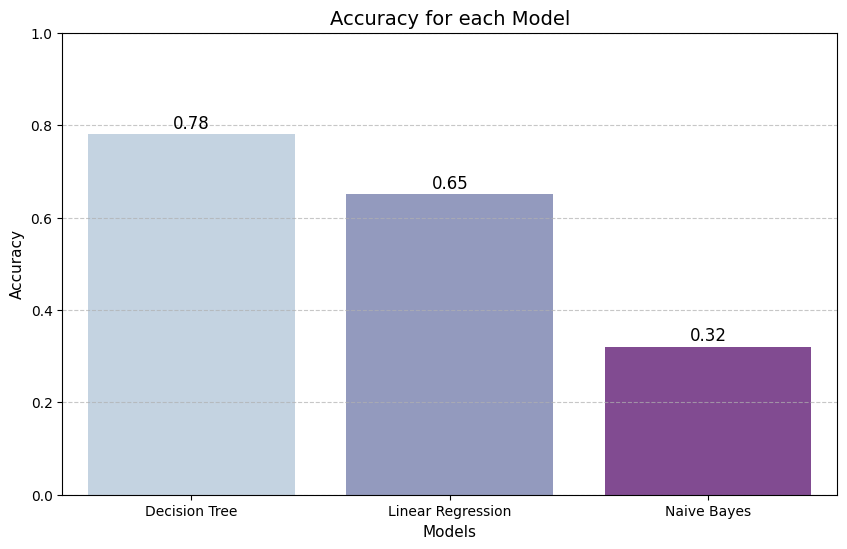

In [23]:
# Data for the graph
x_dataGraph = ['Decision Tree', 'Linear Regression', 'Naive Bayes']
accuracyDataGraph = [0.78, 0.65, 0.32]

# Plot settings
plt.figure(figsize=(10, 6))
sns.barplot(x=x_dataGraph, y=accuracyDataGraph, palette="BuPu", hue=x_dataGraph)
plt.title('Accuracy for each Model', fontsize=14)
plt.xlabel('Models', fontsize=11)
plt.ylabel('Accuracy', fontsize=11)
plt.ylim(0, 1)  # Adjust the y-axis limits according to your data range
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add accuracy values on top of the bars
for i, v in enumerate(accuracyDataGraph):
    plt.text(i, v + 0.005, str(v), ha='center', va='bottom', fontsize=12)

plt.show()

El árbol de decisión continúa destacándose como el mejor modelo de regresión, con un R² notable de 0.78. Esta cifra supera a Naïve Bayes por 0.42 y al modelo de regresión lineal por 0.13. La diferencia entre el árbol de decisión y los otros dos modelos es considerable,  por lo que es evidente que el árbol de decisión es la opción más óptima hasta ahora para predecir el precio de las casas.

### Second Iteration - Classification

#### Feature Creation, Data Split and Standarization

In [24]:
# Make another copy of the dataframe
df_cp = df.copy()

# Define conditions for categorizing SalePrice
conditions = [
    (df_cp['SalePrice'] < 150000),
    (df_cp['SalePrice'] >= 150000) & (df_cp['SalePrice'] <= 250000),
    (df_cp['SalePrice'] > 250000)
]

# Define labels for the categories
labels = ['economical', 'intermediate', 'expensive']

# Create a new column 'SalePriceCategory' based on the conditions and labels
df_cp['SalePriceCategory'] = np.select(conditions, labels)

df_cp

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SalePriceCategory
0,1,60,65.0,8450,7,5,2003,2003,196.0,4.0,...,0,0,0,0,1,0,0,0,1,intermediate
1,2,20,80.0,9600,6,8,1976,1976,0.0,3.0,...,0,0,0,0,1,0,0,0,1,intermediate
2,3,60,68.0,11250,7,5,2001,2002,162.0,4.0,...,0,0,0,0,1,0,0,0,1,intermediate
3,4,70,60.0,9550,7,5,1915,1970,0.0,3.0,...,1,0,0,0,0,0,0,0,1,economical
4,5,60,84.0,14260,8,5,2000,2000,350.0,4.0,...,0,0,0,0,1,0,0,0,1,intermediate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,3.0,...,0,0,0,0,1,0,0,0,1,intermediate
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,3.0,...,0,0,0,0,1,0,0,0,1,intermediate
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,5.0,...,0,0,0,0,1,0,0,0,1,expensive
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,3.0,...,0,0,0,0,1,0,0,0,1,economical


In [25]:
# Separate the target variable 'SalePriceCategory' from features
y = df_cp.pop('SalePriceCategory')

# Exclude columns 'Id' and 'SalePrice' from features
X = df_cp.loc[:, ~df_cp.columns.isin(['Id', 'SalePrice'])]

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=random_state)

In [27]:
print(X_train.shape)
print(X_test.shape)

(1168, 224)
(292, 224)


In [28]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Classification Model

In [29]:
gaussian = GaussianNB()
gaussian.fit(X_train,y_train)
y_pred = gaussian.predict(X_test)

#### Findings and Analysis

In [30]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculating precision
precision = precision_score(y_test, y_pred, average='micro')

# Calculating recall
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

# Printing the results
print("Evaluation metrics on the test set:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score : {f1:.2f}")

Evaluation metrics on the test set:
Accuracy: 0.46
Precision: 0.46
Recall: 0.46
F1 Score : 0.46


Los resultados muestran un desempeño bastante uniforme en todas las métricas de evaluación: precisión, exhaustividad, puntaje F1 y exactitud, todas con un valor de 0.46. Este nivel de desempeño no es bueno, ya que permite inferir que la clasificación de los datos no es precisa.

Se considera que probablemente el modelo no está capturando correctamente la complejidad del conjunto de datos. Es importante mencionar la existencia de puntos atípicos en la variable de respuesta, lo que puede estar contribuyendo a la falta de precisión del modelo. Aunque se haya realizado una estandarización de los datos, los valores atípicos pueden seguir influyendo en el desempeño de este modelo, actuando como puntos de palanca.

In [31]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

  economical       0.91      0.52      0.66       139
   expensive       0.26      0.94      0.41        48
intermediate       0.40      0.15      0.22       105

    accuracy                           0.46       292
   macro avg       0.52      0.54      0.43       292
weighted avg       0.62      0.46      0.46       292



 El modelo parece tener un rendimiento variable para las diferentes clases, con una buena precisión para 'economical' pero una baja para 'expensive' y 'intermediate'. El recall es alto para 'expensive', pero bajo para 'economical' e 'intermediate'. La baja precisión y el alto recall para 'expensive' podrían indicar que el modelo está prediciendo demasiadas instancias como 'expensive', incluyendo algunas que no lo son realmente.

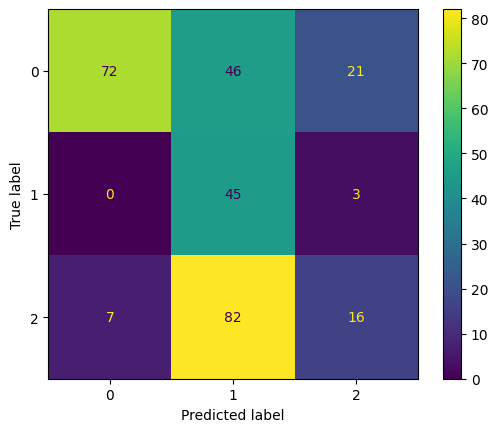

In [32]:
confusionMatrix = confusion_matrix(y_test, y_pred)
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)
cmDisplay.plot()
plt.show()

- Para la clase 0 (casas económicas), se clasificaron correctamente 72 casos.
- Para la clase 1 (casas de gama media), se clasificaron correctamente 45 casos.
- Para la clase 2 (casas de gama alta), se clasificaron correctamente 16 casos.

En cuanto a las equivocaciones del modelo, se puede observar lo siguiente en la matriz de confusión:
- El modelo se equivocó más frecuentemente en la predicción de casas de gama alta (clase 2), ya que tiene el mayor número de clasificaciones erroneas tanto en la clase 0 como en la 1.
- El modelo cometió menos equivocaciones en la predicción de casas de gama media (clase 1), ya que tiene el menor número de clasificaciones erróneas totales.

Esto sugiere que los errores podrían ser resultado de la presencia de valores atípicos en el conjunto de datos, como se mencionó con aterioridad.

#### Overfit Analysis

In [33]:
# Predict on the training set
y_train_pred = gaussian.predict(X_train)

# Calculate evaluation metrics
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='micro')
recall_train = recall_score(y_train, y_train_pred, average='micro')
f1_train = f1_score(y_train, y_train_pred, average='micro')

print("Evaluation metrics on the training set:")
print(f"Accuracy: {accuracy_train:.2f}")
print(f"Precision: {precision_train:.2f}")
print(f"Recall: {recall_train:.2f}")
print(f"F1-score: {f1_train:.2f}")

Evaluation metrics on the training set:
Accuracy: 0.45
Precision: 0.45
Recall: 0.45
F1-score: 0.45


Basándonos en los resultados de los conjuntos de entrenamiento y prueba, no parece haber sobreajuste en el modelo. Si este existira, se observaría un rendimiento significativamente mejor en el conjunto de entrenamiento en comparación con el conjunto de prueba. Sin embargo, los valores de precisión, recall y F1-score son bastante similares entre los dos sets, lo que sugiere que el modelo generaliza razonablemente bien datos nuevos.

In [34]:
# Classification report
print(f'Classification Report: \n{classification_report(y_train, y_train_pred)}')

Classification Report: 
              precision    recall  f1-score   support

  economical       0.89      0.55      0.68       476
   expensive       0.24      1.00      0.38       169
intermediate       0.62      0.19      0.29       523

    accuracy                           0.45      1168
   macro avg       0.58      0.58      0.45      1168
weighted avg       0.67      0.45      0.46      1168



Al igual que en el informe anterior, este modelo también muestra un rendimiento variable para las diferentes clases. Tiene una alta precisión pero bajo recall para 'expensive', lo que indica que clasifica correctamente la mayoría de las instancias 'expensive' pero podría estar perdiendo instancias reales de otras clases.

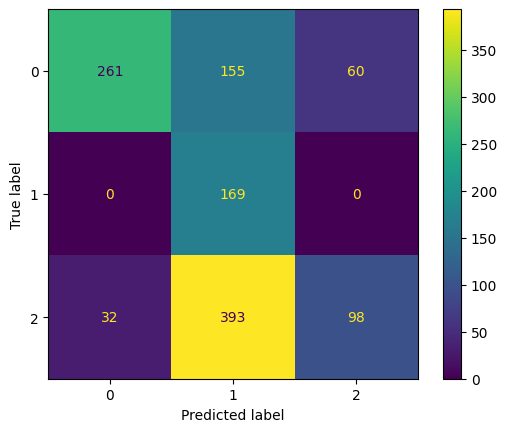

In [35]:
confusionMatrix = confusion_matrix(y_train, y_train_pred)
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)
cmDisplay.plot()
plt.show()

- Para la clase 0 (casas económicas), se clasificaron correctamente 261 casos.
- Para la clase 1 (casas de gama media), se clasificaron correctamente 169 casos.
- Para la clase 2 (casas de gama alta), se clasificaron correctamente 98 casos.

En cuanto a las equivocaciones del modelo, se puede observar lo siguiente en la matriz de confusión:
- El modelo se equivocó más frecuentemente en la predicción de casas de gama alta (clase 2), ya que tiene el mayor número de clasificaciones erroneas tanto en la clase 0 como en la 1.
- El modelo cometió menos equivocaciones en la predicción de casas de gama media (clase 1), ya que tiene el menor número de clasificaciones erróneas totales.

### Third Iteration - Cross Validation

In [36]:
scores = cross_val_score(gaussian, X_train, y_train, cv=5)

print("Cross Validation values:", scores)

print("Mean of scores:", scores.mean())
print("Standar Desviation Scores:", scores.std())

Cross Validation values: [0.34188034 0.38888889 0.41880342 0.4806867  0.46781116]
Mean of scores: 0.4196141007299806
Standar Desviation Scores: 0.051068681839547


Los resultados obtenidos de cross validation con naive bayes indican un rendimiento moderado según el promedio de los valores obtenidos en cada iteración.

Comparando este modelo con el anterior, árboles de decisión, parece que tiene una precisión promedio más alta que el modelo de Naive Bayes. El promedio del cross validation en árboles de decisión está entre 0.779 y 0.797, mientras que con Naive Bayes, es aproximadamente 0.419.

Por lo que respondiendo a la pregunta de cuál modelo funcionó mejor, se puede mencionar que el modelo de árboles de decisión parece ser más prometedor en comparación con Naive Bayes.

matriz de confusion

### Fourth Iteration - Hyperpameter Tuning

#### Setting Hyperpameter Tuning

In [37]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5,
                                    n_repeats=3,
                                    random_state=random_state)

cv_method

RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=42)

In [38]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=gaussian,
                     param_grid=params_NB,
                     cv=cv_method,
                     verbose=1,
                     scoring='accuracy')

#### Regression Model

In [39]:
df_cpReg = df.copy()
yReg = df_cpReg.pop('SalePrice')
XReg = df_cpReg

In [40]:
X_trainR, X_testR, y_trainR, y_testR = train_test_split(XReg, yReg, test_size=0.2, train_size=0.8, random_state=random_state)

In [41]:
gaussian = GaussianNB()
gaussian.fit(X_trainR,y_trainR)
y_pred = gaussian.predict(X_testR)

In [42]:
gs_NB.fit(X_testR, y_testR);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [43]:
gs_NB.best_params_

{'var_smoothing': 0.533669923120631}

##### Findings and Analysis

In [44]:
print("------------------------------------------------")
print(f"RMSE: {mean_squared_error(y_testR, y_pred, squared=False):,.2f}")
print(f"R²: {r2_score(y_testR, y_pred):.2f}")
print("------------------------------------------------")

------------------------------------------------
RMSE: 52,439.26
R²: 0.64
------------------------------------------------


- El RMSE disminuyó de 72,296.37 a 52,439.26, lo que indica que las predicciones del modelo ajustado están más cerca de los valores reales en promedio.
- El R² aumentó de 0.32 a 0.64, lo que sugiere que una mayor proporción de la varianza en la variable dependiente está explicada por las variables independientes en el modelo ajustado.

#### Classification Model

In [45]:
gs_NB.fit(X_test, y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [46]:
gs_NB.best_params_

{'var_smoothing': 0.04328761281083057}

In [47]:
gs_NB.best_score_

0.6174361971556596

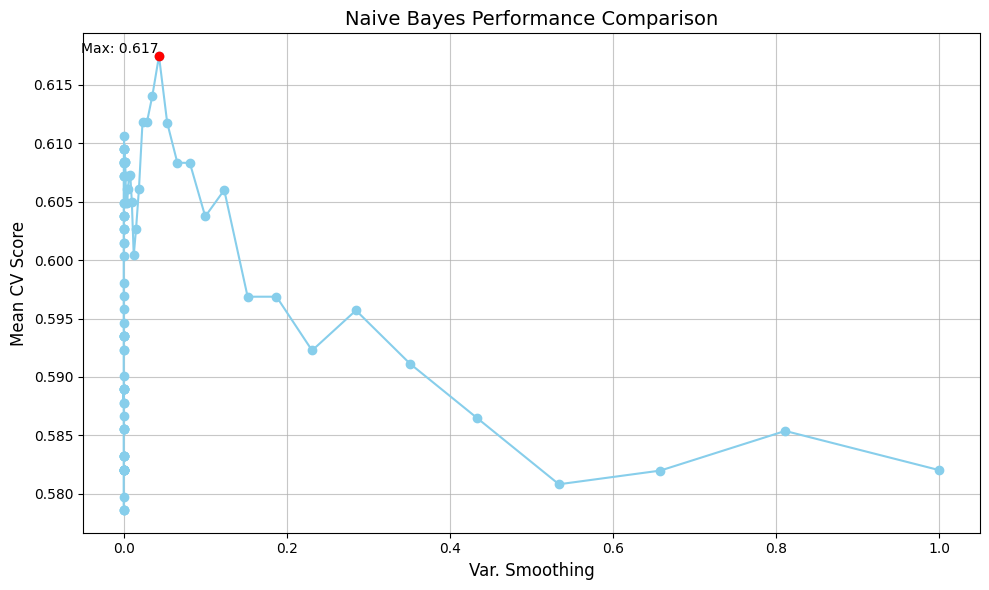

In [48]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))  # Adjust the figure size

plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker='o', color='skyblue', linestyle='-')
plt.xlabel('Var. Smoothing', fontsize=12)
plt.ylabel("Mean CV Score", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Naive Bayes Performance Comparison", fontsize=14)
plt.grid(True, linestyle='-', alpha=0.7)  # Add gridlines with transparency

# Add text annotation for the maximum value
max_score = results_NB['test_score'].max()
max_var_smoothing = results_NB.loc[results_NB['test_score'].idxmax(), 'var_smoothing']
plt.text(max_var_smoothing, max_score, f'Max: {max_score:.3f}',
         horizontalalignment='right', verticalalignment='bottom', fontsize=10)

# Highlight the maximum point
plt.scatter(max_var_smoothing, max_score, color='red', zorder=5)

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

##### Findings and Analysis

In [49]:
y_pred = gs_NB.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
precision_train = precision_score(y_test, y_pred, average='micro')
recall_train = recall_score(y_test, y_pred, average='micro')
f1_train = f1_score(y_test, y_pred, average='micro')

print("Evaluation metrics on the test set:")
print(f'Accuracy: {accuracy_test:.2f}')
print(f"Precision: {precision_train:.2f}")
print(f"Recall: {recall_train:.2f}")
print(f"F1-score: {f1_train:.2f}")

Evaluation metrics on the test set:
Accuracy: 0.67
Precision: 0.67
Recall: 0.67
F1-score: 0.67


El modelo con tuning muestra una mejora significativa en todas las métricas de evaluación en comparación con el modelo sin ajuste. Con el tuning, el modelo logra una precisión, recall, F1-score y accuracy del 67%, lo que indica una mejora sustancial en la capacidad del modelo para clasificar correctamente las instancias en el conjunto de prueba.

In [50]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

  economical       0.95      0.68      0.79       139
   expensive       0.51      0.98      0.67        48
intermediate       0.56      0.53      0.55       105

    accuracy                           0.67       292
   macro avg       0.67      0.73      0.67       292
weighted avg       0.74      0.67      0.68       292



El modelo parece tener un rendimiento sólido, con precisiones, recalls y F1-scores relativamente altos para todas las clases.

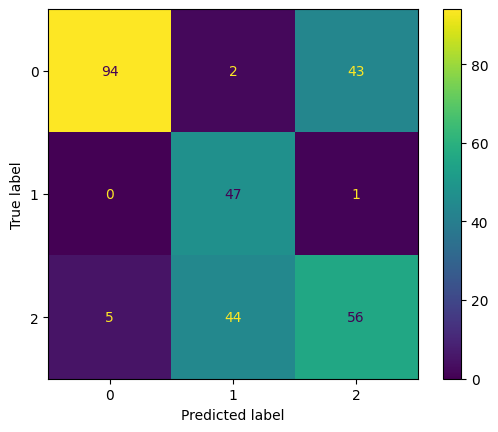

In [51]:
confusionMatrix = confusion_matrix(y_test, y_pred)
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)
cmDisplay.plot()
plt.show()

- Para la clase 0 (casas económicas), se clasificaron correctamente 94 casos.
- Para la clase 1 (casas de gama media), se clasificaron correctamente 47 casos.
- Para la clase 2 (casas de gama alta), se clasificaron correctamente 56 casos.

En cuanto a las equivocaciones del modelo, se puede observar lo siguiente en la matriz de confusión:
- El modelo se equivocó más frecuentemente en la predicción de casas de gama alta (clase 2), ya que tiene el mayor número de clasificaciones erroneas tanto en la clase 0 como en la 1.
- El modelo cometió menos equivocaciones en la predicción de casas de gama media (clase 1), ya que tiene el menor número de clasificaciones erróneas totales.

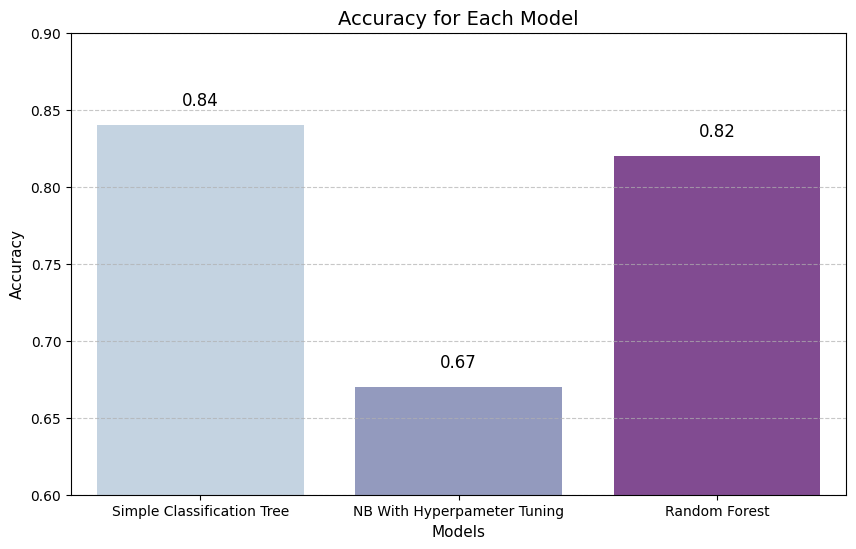

In [52]:
# Data for the graph
x_dataGraph = ['Simple Classification Tree', 'NB With Hyperpameter Tuning', 'Random Forest']
accuracyDataGraph = [0.84, 0.67, 0.82]

# Plot settings
plt.figure(figsize=(10, 6))
sns.barplot(x=x_dataGraph, y=accuracyDataGraph, hue=x_dataGraph, palette="BuPu")
plt.title('Accuracy for Each Model', fontsize=14)
plt.xlabel('Models', fontsize=11)
plt.ylabel('Accuracy', fontsize=11)
plt.ylim(0.6, 0.9)  # Adjusted the y-limit to make room for the bar and label
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add accuracy values on top of the bars
for i, v in enumerate(accuracyDataGraph):
    plt.text(i, v + 0.01, str(v), ha='center', va='bottom', fontsize=12)

plt.show()

Aunque ajustar los parámetros ha mejorado considerablemente la precisión del modelo Naive Bayes, aún persiste su desempeño inferior en comparación con los modelos de árbol, tanto el simple como el Random Forest. Es cierto que Naive Bayes tiende a ser más rápido que otros modelos, pero su principal limitación radica en la suposición de independencia entre las características, la cual puede no ser válida para todos los conjuntos de datos, incluido el presente. Además, la suposición de una distribución normal representa otra limitación importante a tener en cuenta. Todo esto sin duda alguna contribuye a su rendimiento subóptimo en este caso específico.